# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

## Questions Answered: Q1, Q2, and Q5

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**ANSWERS:**

1. This paper is about tidy datasets, and its advantages for manipulation, modelization, and visualization for data analysis as opposed to messy data. It also discusses the ways to tidy data up from its originally messy dataset.

2. the tidy data standard intends to make sure that even though there is a universal way to organize data values in a dataset. With this, it makes it far more easier to set and apply tools, and analyze all data, rather than having to use different, unique tools for each individual dataset.

3. The first quote means that tidy datasets are all similar in the sense that they will all be organized and "tidy" in the same way, while messy datasets can come in many different forms that makes them all uniquely messy. For instance, one messy dataset may be due to the number of null values, and on the other hand, another messy dataset may simply have the wrong row/column identifiers. The second quote means that identifying what a variable could be is very can be easy, but deciding what it should be in the context of what you need the information for may be more difficult, especially if two components may be related to one another.

4. Wickham describes a value as some measured point that can be organized based on its belonging to a variable and an observation. A variable is defined as something that contains all values that measure the same underlying attribute across units, while an observation is defined as something that contains all values measured on the same unit across attributes.

5. Tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. For instance, there is a set expectation for tidy data to set up its rows, columns, and tables, where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

6. The five most common problems with messy datasets are: column headers are values, not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of observational units are stored in the same table; and a single observational unit is stored in multiple tables. The data in table for is messy because it is in a tabular data format, meaning the variables form both rows and columns, and column headers are values, not variable names. Melting a dataset is when you turn columns into rows. In this case, it would mean taking a list of columns that are already variables (colvars), and converting them into two variables: a new column and a new value variable.

7.  11 is messy because the column headers are values (dates). There are simply too many columns to represent each day of the month for this dataset, especially since most of the measurements for said columns are empty anyways. Table 12 however is tidy and molten because it eliminates those and makes each variable its own column accordingly (id, date, element, value, tmax, and tmin). It makes the data far more usable and eliminates all those columns and blank spaces.

8. The "chicken-and-egg" problem related to tidy data is its relationship with the tools it works with: it tidy data is only as useful as the tools that work with it, then tidy tools will be inseparably linked to tidy data itself. Wickham believes that there is much more work in the future that can be done to improve the process of data wrangling. He hopes that our understanding of tidy data and tidy tools becomes more refined, and we are able to make more improvements to get data into a tidy form, or even an alternative form of tidiness.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q 2.1:**

1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

To first check what is needed to be cleaned with the price column, I made sure the values were numeric, and then checked for missing values. I noticed there were 181 n/a values, which is not too much compared to the over 30,000 valid data points. So, removed those rows. Then, I tried to make a box plot to check for outliers. I noticed that the box plot was not being created, and assumed it was due to outliers. To account for them, I added a threshold using .quantile, and after testing certain values, I decided a 93% threshold worked best in my opinion. It optimized the box plot graph without eliminating too many values from the dataset. In the end of all that cleaning, 2,112 values were removed; however, now the data is far more usable without n/a and outlier values. In the end, there were 28,366 values to use.

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

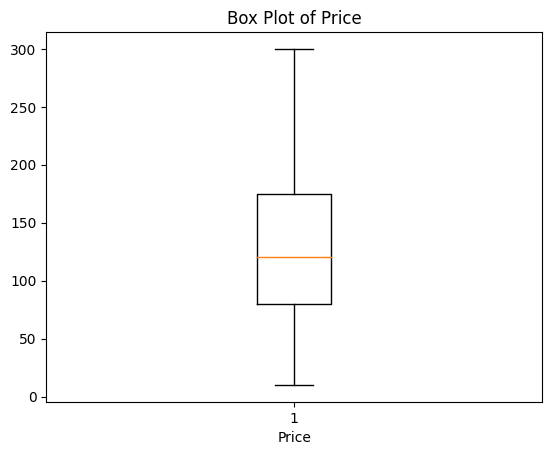

Number of Values Removed:  2112
new length:  28366 old length:  30478
Mean:  132.2377494183177
Median:  120.0
Standard Deviation:  64.72238417112538


In [ ]:
######### 1. NUMERIC VARIABLE CLEANING ########

# SET UP
airbnb_df = pd.read_csv("./data/airbnb_hw.csv")
col_name = 'Price'
airbnb_df[col_name] = pd.to_numeric(airbnb_df[col_name], errors='coerce')
old_length = len(airbnb_df)

# CHECK FOR MISSING VALUES
na_count = airbnb_df[col_name].isna().sum() # na_count = 181 na values
# print("NA VALS: ", na_count)
airbnb_df = airbnb_df.dropna(subset=[col_name]) # drop rows with na values in 'Price'

# CHECK FOR OUTLIERS
airbnb_df = airbnb_df[airbnb_df['Price'] <= airbnb_df['Price'].quantile(0.93)]

# BOXPLOT CHECK
data = airbnb_df[col_name]
plt.boxplot(data)
plt.xlabel(col_name)
plt.title('Box Plot of ' + col_name)
plt.show()

# AFTER CLEANING CHECK:
new_length = len(airbnb_df)
print("Number of Values Removed: ", old_length - new_length)
# print("new length: ", new_length, "old length: ", old_length)
print("Mean: ", data.mean())
print("Median: ", data.median())
print("Standard Deviation: ", data.std())

# print(airbnb_df['Price'].head())
# display(airbnb_df)


**Q 2.2:**
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

First, I checked for missing values. Since there were only 5 n/a values, I decided to drop those rows. The key part of this column cleaning was cleaning up the outliers. To see what the outliers were, I used .value_counts(). Since "Boatomg" only had one value, I assumed that it was a mis-spelling, and changed it to "Boating". Then I noticed that there were three very similar categories: boat, boating, and watercraft. Boat and boating were essentially the same, and watercraft was an umbrella term that boats fell under. So, I put both boat and boating categories under watercraft. I then decided that watercraft and sea disaster accidents related to sharks are typically unprovoked accidents, so I put them under the unprovoked category. Finally, there were many different terms used that all meant unconfirmed, including "under investigation", "questionable", and "unverified". So, those were also added to the "unconfirmed" category. Finally, the four categories are: "provoked", "unprovoked", "invalid", and "unconfirmed". Though unconfirmed and invalid seem similar, I decided that they weren't interchangable, and decided to leave them as is. Still, the data is far cleaner than before, hopefully making data analyzation easier.

In [ ]:
######### 2. CATEGORICAL VARIABLE CLEANING ########

# SET UP
sharks_df = pd.read_csv("./data/sharks.csv", low_memory=False)
col_name2 = 'Type'
old_length2 = len(sharks_df)

# CHECK FOR MISSING VALUES
na_count2 = sharks_df[col_name2].isna().sum() # na_count = 5 na values
print("NA VALS: ", na_count2)
sharks_df = sharks_df.dropna(subset=[col_name2]) # drop rows with na values in 'Price'

# CHECK FOR OUTLIERS
print(sharks_df.value_counts())

sharks_df.loc[sharks_df[col_name2] == 'Boatomg', col_name2] = 'Boating'
sharks_df.loc[sharks_df[col_name2] == 'Boating', col_name2] = 'Boat'
sharks_df.loc[sharks_df[col_name2] == 'Boat', col_name2] = 'Watercraft'
sharks_df.loc[sharks_df[col_name2] == 'Watercraft', col_name2] = 'Unprovoked'
sharks_df.loc[sharks_df[col_name2] == 'Sea Disaster', col_name2] = 'Unprovoked'
sharks_df.loc[sharks_df[col_name2] == 'Unverified', col_name2] = 'Unconfirmed'
sharks_df.loc[sharks_df[col_name2] == 'Under investigation', col_name2] = 'Unconfirmed'
sharks_df.loc[sharks_df[col_name2] == 'Questionable', col_name2] = 'Unconfirmed'

# AFTER CLEANING CHECK:
print("\n")
print("Number of Values Removed: ", old_length2 - len(sharks_df))
print(sharks_df[col_name2].value_counts())

# print(sharks_df['Type'].head())
# display(sharks_df)

NA VALS:  5
Series([], dtype: int64)


Number of Values Removed:  5
Unprovoked     5299
Provoked        593
Invalid         552
Unconfirmed      13
Name: Type, dtype: int64


**Q 2.3:**
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

Originally there were no null values. But for this column, I noticed that there were only three variables: 1, 0, and 9. After reading the codebook for the data, I determined that 1 & 0 were the only valid answers for this. So, I made every 9 value equal to np.nan.

In [ ]:
######### 3. SET UP FOR 3 & 4 ########
# website: http://www.vcsc.virginia.gov/pretrialdataproject2017.html
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_df = pd.read_csv(url,low_memory=False)

KeyboardInterrupt: ignored

In [ ]:
######### 3. SET UP FOR 3 & 4 (THIS REQUIRES YOU TO UPLOAD THE DATASET INTO YOUR DATA FOLDER) ########
pretrial_df = pd.read_csv("./data/October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv",low_memory=False)

In [ ]:
######### 3. DUMMY VARIABLE CLEANING ########
# SET UP (includes renaming)
col_name3 = 'Was Released'
pretrial_df = pretrial_df.rename(columns={'WhetherDefendantWasReleasedPretrial': col_name3})
pretrial_df[col_name3] = pd.to_numeric(pretrial_df[col_name3], errors='coerce')
old_length3 = len(pretrial_df)

# CHECK FOR MISSING VALUES
na_count3 = pretrial_df[col_name3].isna().sum() # na_count = 0 na values
print("NA VALS: ", na_count3)

# CHECK FOR OUTLIERS
print("Old Values: \n", pretrial_df[col_name3].value_counts())
pretrial_df[col_name3] = pretrial_df[col_name3].replace(9, np.nan)
print("New Values: \n", pretrial_df[col_name3].value_counts())

# display(pretrial_df)

NA VALS:  31
Old Values: 
 1.0    19154
0.0     3801
Name: Was Released, dtype: int64
New Values: 
 1.0    19154
0.0     3801
Name: Was Released, dtype: int64
NA VALS:  31


**Q 2.4:**

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Looking at the 'SetenceTypeAllChargesAtConvictionInContactEvent' variable, I noticed that when that value was 4 and 9 always had empty imposed sentence variables corresponding to it. Based on the code book, I realized that when the sentence type was 4, the imposed sentence should have been 0, and when the sentence type was 9, the imposed sentence should just be np.nan.

In [ ]:
######### 4. MISSING VALUES, NOT AT RANDOM CLEANING ########
col_name4 = 'ImposedSentenceAllChargeInContactEvent'
col_name_type = 'SentenceTypeAllChargesAtConvictionInContactEvent'
pretrial_df[col_name4] = pd.to_numeric(pretrial_df[col_name4], errors='coerce')

print("OLD DATA: \n")
print("Imposed Sentence: \n", pretrial_df[col_name4].value_counts())
# print("Sentence Type: \n", pretrial_df[col_name_type].value_counts())


pretrial_df.loc[pretrial_df[col_name_type] == 4, col_name4] = 0
pretrial_df.loc[pretrial_df[col_name_type] == 9, col_name4] = np.nan

print(" NEW DATA: \n")
print("Imposed Sentence: \n", pretrial_df[col_name4].value_counts())
# print("Setence Type: \n", pretrial_df[col_name_type].value_counts())

# display(pretrial_df[col_name4])

OLD DATA: 

Imposed Sentence: 
 0.000000     13732
12.000000     1404
0.985626      1051
6.000000       809
3.000000       787
             ...  
49.971253        1
57.034908        1
79.926078        1
42.164271        1
1.657084         1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64
 NEW DATA: 

Imposed Sentence: 
 0.000000     13732
12.000000     1404
0.985626      1051
6.000000       809
3.000000       787
             ...  
49.971253        1
57.034908        1
79.926078        1
42.164271        1
1.657084         1
Name: ImposedSentenceAllChargeInContactEvent, Length: 483, dtype: int64


0              NaN
1        60.000000
2        12.000000
3         0.985626
4         0.000000
           ...    
22981     0.000000
22982          NaN
22983     0.000000
22984     0.000000
22985     0.000000
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: float64

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**ANSWERS:**

1. The US Census Bureau collects race data based on self-identification, meaning people can choose to report what they identify as. The Census asks two questions: if you are Hispanic, Latino, or of Spanish origin, and then was asked for specific racial categories. People are allowed to select
2. The US Census asks about race in order to use the data to represent racial groups when needed in data analysis or statistics. Representation is important, and having data on race can also support findings on correlations/relationships between race and other factors. Politically and socially, the data can be used to evaluate gov. programs and policies to make sure that it is accounting for all racial groups, and is as fair and equitable as possible. This can include policy making, regulations, etc. Data quality is important because inaccurate/incomplete data can skew important decisions. In the case of race, resources and policies can be changed negatively if data is inaccurate.
3. One thing the Census did really well on was acknowledging those who identify as more than one race. It's important to note that multi-racial people exist, and it makes the data significantly more accurate when people are able to truly answer the questions to their best ability. Since the Census does not survey every single person, I think one thing the Census can improve on is their outreach with people in order to expand the true accuracy of the data. Future surveys may want to be more specific/clear with their options, or offer more inclusive choices for racial groups that may have a hard time figuring out just where exactly they should identify as. Some good practices that can be adopted more widely includes their open transparency on data usage, and their continuous updates to improve the survey.
4. Regarding sex, the US Census has two choices: Male or Female. However, they include a gender questionnare section that asks about gender to account for transgender people and other non-male/female identifying people. Some benefits of this is that there is a clear distinction between sex and gender that can make data gathering more clear. On the other hand, the gender question may still be confusing. For instance, for transgender people, it may be difficult to choose because they can still identify as a male/female, but still be a transgender person. If the question were a multi-select format, this question may be more clear.
5. When cleaning the data, some concerns may include missing values, or outlier values. With a missing value, it can be a significant issue that will make the analysis completely skewed or biased, and can lead to incomplete data submissions. Relying on self-identification may also lead to inaccurate results that can't be noticed when cleaning or reading the data. Some good practices people might adopt include answering questions truthfully so that data stays as accurate as possible. With cleaning the data, handling missing values carefully is also a good practice to ensure data is good to handle. A bad practice would be the opposite: not handling/poorly handling data. This can be harmful to the data because it can cause misinformation.
6. There are many concerns that may come with an algorithm imputing values for data. Some concerns would include the data quality (it may not be as clean or readable for a person to be able to understand, or it may forget certain things to account for), and it may be biased without realizing it. Algorithms can carry inherent biases when it is working with a dataset, which can be very unfair and harmful to surveyed data like race, gender, sex, or sexuality.

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.